<a href="https://colab.research.google.com/github/Bhuvannnn/Income-Classifier/blob/main/DS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSE-C
Group Members-
Bhuvan Shah IU1941230146
Saumil Shah IU1941230156
Harsh Shah IU1941230147
Runil Patel IU1941230140
DS Project


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/DS_Project_Dataset.csv",na_values=[" ?"])

1)Write the name of the variables with its datatype,
description and categories of the variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


2. Identify if data is clean

In [ ]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
df['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

3. Look for missing values

In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
df1=df.dropna(axis=0)
df1.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
df1.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
df1


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


4. Identify variables influencing salary status and look for
possible relationships between variables

In [ ]:
correlation =  df1.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [ ]:
# Gender Propotion table

gender = pd.crosstab(index = df1["gender"],
                    columns = 'count',
                    normalize = True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [ ]:
gender_salstat = pd.crosstab(index = df1["gender"],
                              columns = df1["SalStat"],
                              margins = True,
                              normalize = 'index')

gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


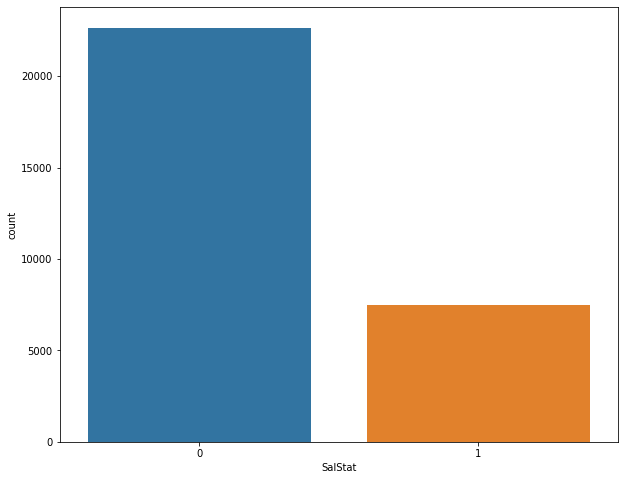

In [ ]:
# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

ax, fig = plt.subplots(figsize=[10,8])
sns.countplot(df1['SalStat'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


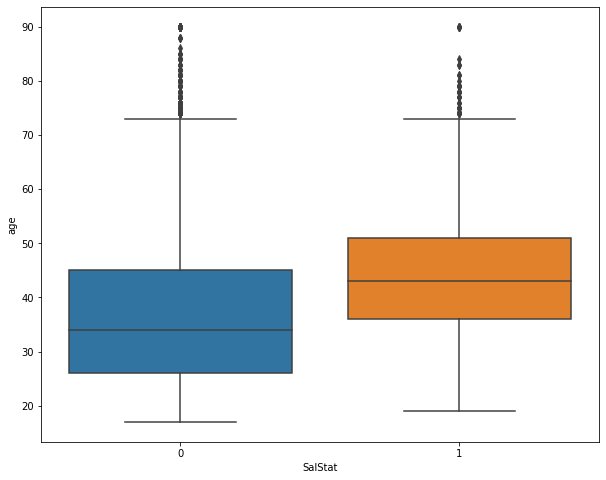

In [ ]:
# Box Plot
ax, fig = plt.subplots(figsize=[10,8])
sns.boxplot('SalStat','age',data = df1)

In [ ]:
#Reindexing the salary status names to 0,1
df1['SalStat']=df1['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

print(df1['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Train Test Split

In [ ]:
sorted_df1_data = df1.copy()

cols = ['gender','nativecountry','race','JobType']

modify_df1_data = sorted_df1_data.drop(cols,axis = 1)

updated_df1=pd.get_dummies(modify_df1_data, drop_first=True)

#Storing the column names 
columns_list2=list(updated_df1.columns)

# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))

In [ ]:
y2=updated_df1['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [ ]:
x2 = updated_df1[features2].values
print(x2)

[[28  0  0 ...  0  0  0]
 [40  0  0 ...  1  0  0]
 [40  0  0 ...  0  0  0]
 ...
 [40  0  0 ...  0  0  0]
 [40  0  0 ...  0  0  0]
 [40  0  0 ...  0  0  0]]


Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_2 = LogisticRegression(solver='liblinear')

# Fitting the values for x and y
logistic_model_2.fit(train_x2,train_y2)

# Prediction from test data
prediction_log_2 = logistic_model_2.predict(test_x2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score_log_2 = accuracy_score(test_y2, prediction_log_2)
print(accuracy_score_log_2)

0.8388772240026522


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
# Storing the K nearest neighbors classifier
KNN_classifier_2 = KNeighborsClassifier(n_neighbors = 10)

# Fitting the values for X and Y
KNN_classifier_2.fit(train_x2,train_y2) 

# Predicting the test values with model
prediction_knn_2 = KNN_classifier_2.predict(test_x2)

# Calculating the accuracy
accuracy_score_knn_2 = accuracy_score(test_y2, prediction_knn_2)
print(accuracy_score_knn_2)

0.843518620842082
